In [1]:
import pyscisci.all as pyscisci

import pandas as pd
import numpy as np
import matplotlib.pylab as plt
try:
    import seaborn as sns
    sns.set_style('white')
except:
    pass

%matplotlib inline

In [2]:
# set this path to where the APS database will be stored
#path2aps = '/home/ajgates/APS'
path2aps = '/Volumes/GatesExpansionDrive/DataSets/APS/APS2019'

In [3]:
myaps = pyscisci.APS(path2aps, keep_in_memory=False) 

# set keep_in_memory=False if you want to load the database each time its needed - good for when you 
# cant keep more than one DataFrame in memory at a time

# otherwise keep_in_memory=True will keep each DataFrame in memory after its loaded

In [4]:
# You need to request access to the APS dataset
# Follow this link and fill out their form, they should email you
# links to download two files.  (usually takes about 1 week.)

myaps.download_from_source(files_to_download='orig')

APS is shared by request from the American Physical Society.  Contact APS to download the source files.


In [4]:
# before we can start running our analysis, we have to preprocess the raw data into
# DataFrames that are more convinent to work with
myaps.preprocess(show_progress=True)



Parsing Complete
Saving Publication DataFrames


In [4]:
# NOTE: APS does not contain disambiguated author or affiliation information by default, although researchers 
# have produced their own disambiguation to supplement the raw data

# Here, we include the author disambiguation used in Sinatra et al. (2016)
myaps.download_from_source(files_to_download='paa_supplement')

# to use this after downloading you need to set a new path
#myaps.set_new_data_path(dataframe_name='paa', new_path='publicationauthoraffiliation2010supplement')

New data saved to publicationauthoraffiliation2010supplement.


In [4]:
publicationauthoraffiliation0.hdf
publicationauthoraffiliation0.hdf

'publicationauthoraffiliation'

In [5]:
myaps.paa

[0]


Loading Publication Author Affiliation:   0%|          | 0/1 [00:00<?, ?it/s]

HDF5ExtError: HDF5 error back trace

  File "H5F.c", line 509, in H5Fopen
    unable to open file
  File "H5Fint.c", line 1652, in H5F_open
    unable to read superblock
  File "H5Fsuper.c", line 411, in H5F__super_read
    file signature not found

End of HDF5 error back trace

Unable to open/create file '/Volumes/GatesExpansionDrive/DataSets/APS/APS2019/publicationauthoraffiliation2010supplement/publicationauthoraffiliation2010supplement0.hdf'

In [ ]:
# APS creates three dataframes:
# pub  - keeps all of the publication information
# columns : ['PublicationId', 'Title', 'Date', 'Year', 'Doi', 'JournalId', 'Volume', 'Issue', 'PageStart', 'PageEnd', 'DocType', 'TeamSize']

# journal  - keeps all of the journal information
# columns : ['JournalId', 'FullName', 'AbbreviatedName', 'Publisher']

# affiliation  - keeps all affiliation information
# columns : ['AffiliationId', 'Address']

# paa  - links the publications to authors and affiliations
# columns : ['PublicationId', 'OrigAuthorName', 'AffiliationId', 'AuthorSequence']

# pub2field  - links the publications to fields (aka subjectAreas)
# columns : ['PublicationId', 'FieldId']

# pub2ref  - keeps the citation information
# columns : ['CitingPublicationId', 'CitedPublicationId']


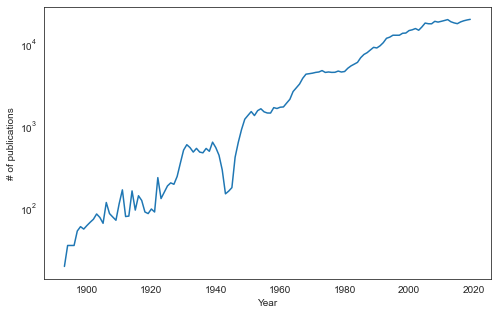

In [6]:
# lets plot the number of publications each year
yearly_articles = pyscisci.groupby_count(df=myaps.pub , colgroupby='Year', colcountby='PublicationId', count_unique=True,
                               show_progress=True)
yearly_articles.sort_values(by='Year', inplace=True)
yearly_articles = yearly_articles.loc[yearly_articles['Year'] > 0]

fig, ax = plt.subplots(1,1,figsize=(8,5))

ax.plot(yearly_articles['Year'],yearly_articles['PublicationIdCount'])

ax.set_xlabel('Year')
ax.set_ylabel("# of publications")
ax.set_yscale('log')

plt.show()

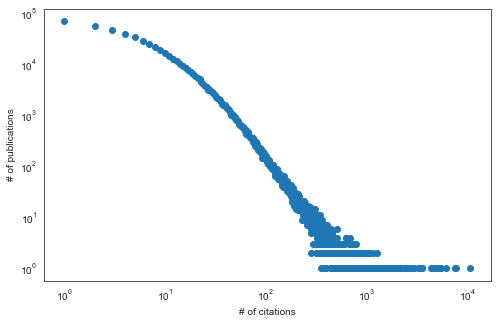

In [7]:
# now we can see the distribution of citation counts 
citations = pyscisci.groupby_count(df=myaps.pub2ref , colgroupby='CitedPublicationId', colcountby='CitingPublicationId', 
                          count_unique=True, show_progress=True)

citevalues, citecounts = np.unique(citations['CitingPublicationIdCount'].values, return_counts=True)

fig, ax = plt.subplots(1,1,figsize=(8,5))

ax.scatter(citevalues, citecounts)

ax.set_xlabel('# of citations')
ax.set_ylabel("# of publications")
ax.set_xscale('log')
ax.set_yscale('log')

plt.show()